# ERSA Alternative Hypothesis: Modeling Recent Shared Ancestry

## Overview

The **alternative hypothesis** in ERSA (Estimation of Recent Shared Ancestry) models the scenario where two individuals share **recent genealogical ancestry**. Unlike the null hypothesis (random population members), these individuals have traceable common ancestors within a few generations.

### Key Concepts:
- IBD segments arise from two sources: recent ancestry and population background
- Relationship characterized by parameters `d` (meioses) and `a` (ancestors)
- Segments from recent ancestry are typically longer and more numerous
- The likelihood combines both recent and background components

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import factorial, comb
import pandas as pd
import seaborn as sns
from typing import List, Tuple, Dict, Optional
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Set random seed for reproducibility
np.random.seed(42)

The variables

- $d$ = total meioses separating the individuals
- $a$ = number of common ancestors (1 or 2)
- $n_A$ = number of segments from recent ancestry
- $n_P$ = number of background segments - segments from other ancestors in the population
- $s_A$ = set of segment (lengths) from recent ancestry
- $s_P$ = set of segment (length) from distant ancestry
- $t$ = minimum segment threshold (2.5 cM)

Note that 
- $n_P + n_A = n$ where $n$ is the total number of segments shared between the pair.
- $s_A$ and $s_P$ are two mutually exclusive subsets of $s$

## 1. Mathematical Framework of the Alternative Hypothesis

Under the alternative hypothesis $H_a$, IBD segments arise from two sources:

1. **Recent ancestry segments** (subscript A): Inherited from recent common ancestors
2. **Background segments** (subscript P): Population-level background sharing

The likelihood is:

$$L_R = L_A(n_A, s_A|d, a, t) \cdot L_P(n_P, s_P|t) \tag{4}$$

where:
- $d$ = total meioses separating the individuals
- $a$ = number of common ancestors (1 or 2)
- $n_A$ = number of segments from recent ancestry
- $n_P$ = number of background segments - segments from other ancestors in the population
- $s_A$ = set of segment (lengths) from recent ancestry
- $s_P$ = set of segment (length) from distant ancestry
- $t$ = minimum segment threshold (2.5 cM)

$n_P$ and thus $L_P$ follows Equation 1 of the Null Hypothesis, which is that the pair is no more related than two randomly selected individuals from the population.

"$L_A$ is the likelihood that two individuals share $n$ autosomal segments from recent ancestor(s) specified by $d$ and $a$, with the segment lengths specified by $s_A$" (Huff et al., 2011, p. 770).

$$L_A(n_A, s_A|d, a, t) = N_A(n|d, a, t) \cdot S_A(s_A|d, t) \tag{5}$$

$L_A$ is the **likelihood** (not probability) that can be expressed as the product of likelihoods of the number of shared segments and the length of each segment, which parallels Equation 1:

$$L_P(n, s|t) = N_P(n|t) \cdot S_P(s|t) \tag{1}$$

**Key difference**: The alternative hypothesis (Equation 5) includes the parameters $d$ (total meioses) and $a$ (number of common ancestors) that specify the targeted relatedness between individuals, whereas the null hypothesis (Equation 1) assumes no specific relationship beyond random population-level sharing.

## Likelihood vs Probability

### Likelihood (what ERSA uses):
$$L_A(n_A, s_A|d, a, t) = N_A(n|d, a, t) \cdot S_A(s_A|d, t) \tag{5}$$

This reads as: "The likelihood of observing data $(n_A, s_A)$ **given** that the relationship is $(d, a)$"
- Fixed parameters: $d, a$ (the relationship)
- Variable: the observed data $(n_A, s_A)$
- Question: How likely is this data if we assume this specific relationship?

### Probability (Bayesian approach):
$$P(d, a|n_A, s_A, t) = \frac{L_A(n_A, s_A|d, a, t) \cdot P(d, a)}{P(n_A, s_A|t)} \tag{Bayes}$$

This reads as: "The probability that the relationship is $(d, a)$ **given** that we observed data $(n_A, s_A)$"
- Fixed: the observed data $(n_A, s_A)$
- Variable: the relationship parameters $(d, a)$
- Question: What's the probability of this relationship given what we observed?

### Key Difference:
- **Likelihood**: $L(\text{data}|\text{relationship})$ - How likely is the data given a specific relationship?
- **Probability**: $P(\text{relationship}|\text{data})$ - What's the probability of the relationship given the data?

### In Practice:
ERSA uses maximum likelihood estimation (MLE), finding the relationship $(d, a)$ that maximizes the likelihood:
$$(\hat{d}, \hat{a}) = \arg\max_{d,a} L_A(n_A, s_A|d, a, t)$$

To get actual probabilities of relationships, you would need:
1. Prior probabilities $P(d, a)$ for each relationship type
2. The marginal likelihood $P(n_A, s_A|t)$ (sum over all possible relationships)
3. Apply Bayes' theorem

## Modeling Segment Lengths Under the Alternative Hypothesis

Recall equation 5:
$$L_A(n_A, s_A|d, a, t) = N_A(n|d, a, t) \cdot S_A(s_A|d, t) \tag{5}$$

The second component, $S_A(s_A|d, t)$, represents the likelihood of observing the specific set of segment lengths under recent ancestry. This is computed as:

$$S_A(s|d, t) = \prod_{i \in s} F_A(i|t) \tag{6}$$

**Explanation**: "Equation 6 assumes that, for a given value of $d$, the lengths of segments are independent. This assumption is not strictly true. One might imagine that the presence of a particularly long segment would reduce the genomic space available for additional segments. However, because the length of any one segment is small relative to the genome and because the genome is physically divided into chromosomes, the segment lengths are approximately independent" (Huff et al., 2011, p. 770).

**Parallel Structure**: Equation 6 directly parallels Equation 2 from the null hypothesis:

$$S_P(s|t) = \prod_{i \in s} F_P(i|t) \tag{2}$$

Both equations use the same product structure, assuming independence of segment lengths. The key difference is:
- Equation 2 uses $F_P(i|t)$ - the population background distribution
- Equation 6 uses $F_A(i|t)$ - the distribution under recent ancestry with parameters $d$ and $a$

## Understanding Segment Length Distribution Under Recent Ancestry

Let's look at $F_A(i|t)$ component from equation 6.

### The Inheritance Probability Framework

"For two individuals who are related by an inheritance path that is $d$ meioses long, the probability that they will inherit any particular autosomal segment from a common ancestor on that path is equal to $1/2^{(d-1)}$" (Huff et al., 2011, p. 770).

**Understanding the $1/2^{(d-1)}$ formula:** Let's trace how a specific segment travels from a common ancestor to two relatives. Consider first cousins who share a grandmother:

At each meiosis (when a parent passes DNA to a child), each autosomal segment has a 1/2 chance of being inherited because:
- The parent has two copies of each chromosome (one from each of their parents)
- The child randomly inherits one of these two copies
- Therefore, any specific segment from a grandparent has a 1/2 chance of being passed on

For first cousins:
- The grandmother has a specific DNA segment on one of her two chromosome copies
- Path to cousin 1: grandmother → parent 1 (1/2 chance of inheriting that specific segment) → cousin 1 (1/2 chance)
- Path to cousin 2: grandmother → parent 2 (1/2 chance) → cousin 2 (1/2 chance)
- Total: 4 meioses, so $d = 4$

However, let's consider probabilities:
- We specify that there is a specific segment from grandmother to parent 1 that we are following. 
  - This removes the 1/2 chance from grandmother to parent 1. There is no chance here. 
  - We have selected the specific transmitted segment that we are following.
- That same segment getting transmitted from from parent 1 to cousin 1 has a 1/2 chance.
- That same segment getting transmitted from grandmother to parent 2 has a 1/2 chance.
- That same segment getting transmitted from from parent 2 to cousin 2 has a 1/2 chance.

So, the probability both cousins inherit the same segment from grandmother is:
- $(1/2) \times (1/2) \times (1/2) = (1/2)^3 = 1/2^{(d-1)}$ where $d-1 = 3$

The formula is $1/2^{(d-1)}$ rather than $1/2^d$ because once we selected the segment transmitted from the common ancestor in the first meiosis, we only need to track $d-1$ chance (independent) transmission events for both individuals to share it.


### Expected Number of Shared Segments

"The expected number of shared autosomal segments that could potentially be inherited from a common ancestor is equal to $rd + c$, where $c$ is the number of autosomes and $r$ is the expected number of recombination events per haploid genome per generation" (Huff et al., 2011, p. 770).

**Breaking this down:**
- $c$ segments from chromosomes: At minimum, if no recombination occurs, relatives can share up to $c = 22$ autosomal segments (one per chromosome)
- $rd$ segments from recombination: Each generation adds approximately $r \approx 35.3$ recombination events, creating new segment boundaries. Over $d$ meioses, this creates $rd$ additional potential segments
- Total potential segments: $rd + c$

Run the next cell to get a visual explanation.

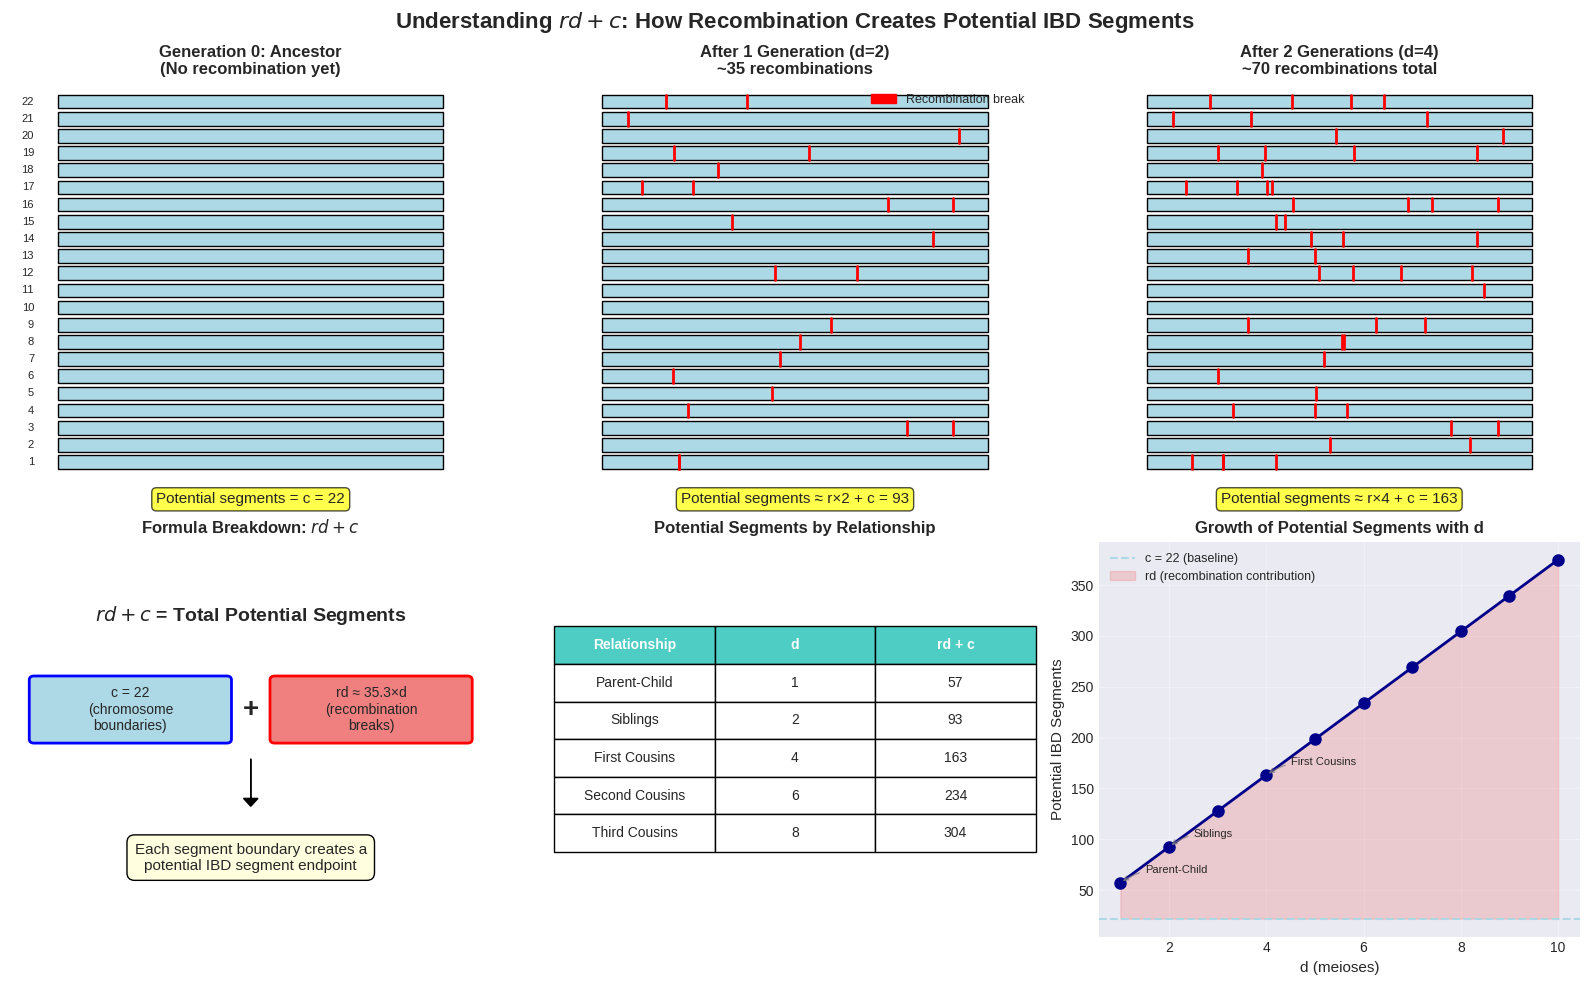

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle, FancyBboxPatch
import matplotlib.patches as mpatches

# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Understanding $rd + c$: How Recombination Creates Potential IBD Segments', 
             fontsize=16, fontweight='bold')

# Parameters
r = 35.3  # recombinations per generation
c = 22    # number of autosomes

# Set random seed for consistency
np.random.seed(42)

# Generate recombination positions that accumulate
# First generation breaks
first_gen_breaks = {}
for i in range(22):
    n_breaks = np.random.poisson(35.3/22)
    if n_breaks > 0:
        first_gen_breaks[i] = np.random.uniform(1.5, 8.5, min(n_breaks, 2))
    else:
        first_gen_breaks[i] = []

# Second generation adds more breaks
second_gen_breaks = {}
for i in range(22):
    # Keep the first generation breaks
    existing_breaks = list(first_gen_breaks[i])
    # Add new breaks
    n_new_breaks = np.random.poisson(35.3/22)
    if n_new_breaks > 0:
        new_breaks = np.random.uniform(1.5, 8.5, min(n_new_breaks, 2))
        second_gen_breaks[i] = existing_breaks + list(new_breaks)
    else:
        second_gen_breaks[i] = existing_breaks

# Subplot 1: No recombination (d=0)
ax = axes[0, 0]
ax.set_title('Generation 0: Ancestor\n(No recombination yet)', fontsize=12, fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 23)

# Draw 22 chromosomes as bars
for i in range(22):
    rect = Rectangle((1, i+0.5), 8, 0.8, 
                    facecolor='lightblue', edgecolor='black', linewidth=1)
    ax.add_patch(rect)
    ax.text(0.5, i+0.9, f'{i+1}', ha='right', va='center', fontsize=8)

ax.text(5, -1.5, f'Potential segments = c = {c}', ha='center', fontsize=11, 
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Chromosome', fontsize=10)
ax.axis('off')

# Subplot 2: After 1 generation (d=2 for siblings)
ax = axes[0, 1]
ax.set_title('After 1 Generation (d=2)\n~35 recombinations', fontsize=12, fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 23)

# Draw chromosomes with first generation breaks
for i in range(22):
    # Base chromosome
    ax.add_patch(Rectangle((1, i+0.5), 8, 0.8, 
                          facecolor='lightblue', edgecolor='black', linewidth=1))
    
    # Add first generation recombination breaks
    for pos in first_gen_breaks[i]:
        ax.plot([pos, pos], [i+0.5, i+1.3], 'r-', linewidth=2)

ax.text(5, -1.5, f'Potential segments ≈ r×2 + c = {35.3*2 + 22:.0f}', 
        ha='center', fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Add legend for recombination
red_line = mpatches.Patch(color='red', label='Recombination break')
ax.legend(handles=[red_line], loc='upper right', fontsize=9)

# Subplot 3: After 2 generations (d=4 for first cousins)
ax = axes[0, 2]
ax.set_title('After 2 Generations (d=4)\n~70 recombinations total', fontsize=12, fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 23)

for i in range(22):
    ax.add_patch(Rectangle((1, i+0.5), 8, 0.8, 
                          facecolor='lightblue', edgecolor='black', linewidth=1))
    
    # Draw all accumulated breaks (first gen + second gen)
    for pos in second_gen_breaks[i]:
        ax.plot([pos, pos], [i+0.5, i+1.3], 'r-', linewidth=2)

ax.text(5, -1.5, f'Potential segments ≈ r×4 + c = {35.3*4 + 22:.0f}', 
        ha='center', fontsize=11,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
ax.set_xticks([])
ax.set_yticks([])
ax.axis('off')

# Subplot 4: Visual explanation of rd + c formula
ax = axes[1, 0]
ax.set_title('Formula Breakdown: $rd + c$', fontsize=12, fontweight='bold')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

# Draw visual representation
ax.text(5, 8, '$rd + c$ = Total Potential Segments', ha='center', fontsize=14, fontweight='bold')

# Base chromosomes
rect1 = FancyBboxPatch((0.5, 5), 4, 1.5, boxstyle="round,pad=0.1",
                       facecolor='lightblue', edgecolor='blue', linewidth=2)
ax.add_patch(rect1)
ax.text(2.5, 5.75, f'c = {c}\n(chromosome\nboundaries)', ha='center', va='center', fontsize=10)

# Plus sign
ax.text(5, 5.75, '+', ha='center', va='center', fontsize=20, fontweight='bold')

# Recombination breaks
rect2 = FancyBboxPatch((5.5, 5), 4, 1.5, boxstyle="round,pad=0.1",
                       facecolor='lightcoral', edgecolor='red', linewidth=2)
ax.add_patch(rect2)
ax.text(7.5, 5.75, f'rd ≈ {r}×d\n(recombination\nbreaks)', ha='center', va='center', fontsize=10)

# Arrow down
ax.arrow(5, 4.5, 0, -1, head_width=0.3, head_length=0.2, fc='black', ec='black')

# Result
ax.text(5, 2, 'Each segment boundary creates a\npotential IBD segment endpoint', 
        ha='center', va='center', fontsize=11,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow"))

ax.axis('off')

# Subplot 5: Table showing values for different d
ax = axes[1, 1]
ax.set_title('Potential Segments by Relationship', fontsize=12, fontweight='bold')
ax.axis('off')

# Create table data
relationships = [
    ('Parent-Child', 1, r*1 + c),
    ('Siblings', 2, r*2 + c),
    ('First Cousins', 4, r*4 + c),
    ('Second Cousins', 6, r*6 + c),
    ('Third Cousins', 8, r*8 + c)
]

table_data = [['Relationship', 'd', 'rd + c']]
for rel, d_val, total in relationships:
    table_data.append([rel, str(d_val), f'{total:.0f}'])

# Create table
table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style header row
for i in range(3):
    table[(0, i)].set_facecolor('#4ECDC4')
    table[(0, i)].set_text_props(weight='bold', color='white')

# Subplot 6: Graphical representation of growth
ax = axes[1, 2]
ax.set_title('Growth of Potential Segments with d', fontsize=12, fontweight='bold')

d_values = np.arange(1, 11)
potential_segments = r * d_values + c

ax.plot(d_values, potential_segments, 'o-', linewidth=2, markersize=8, color='darkblue')
ax.axhline(c, color='lightblue', linestyle='--', label=f'c = {c} (baseline)')
ax.fill_between(d_values, c, potential_segments, alpha=0.3, color='lightcoral', 
                label=f'rd (recombination contribution)')

ax.set_xlabel('d (meioses)', fontsize=11)
ax.set_ylabel('Potential IBD Segments', fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc='upper left', fontsize=9)

# Add annotations for specific points
for rel, d_val, _ in relationships[:3]:
    y_val = r * d_val + c
    ax.annotate(rel, xy=(d_val, y_val), xytext=(d_val+0.5, y_val+10),
                fontsize=8, ha='left',
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', 
                              color='gray', alpha=0.7))

plt.tight_layout()
plt.show()

The value $rd + c$ represents the *maximum possible* number of distinct IBD segments that could be inherited from a common ancestor—it's the total number of potential segment boundaries created by recombination. 

For example:
- **Parent and child** ($d=1, a=1$):
  - Potential segments: $rd + c = 35.3(1) + 22 = 57$
  
- **First cousins** ($d=4, a=2$): 
  - Potential segments: $rd + c = 35.3(4) + 22 = 163$

- **Third cousins** ($d=8, a=2$):
  - Potential segments: $rd + c = 35.3(8) + 22 = 304$  

However, the *actual* number of segments shared between two relatives is much smaller. To estimate the actual number of shared segments, we recognize that each potential segment has only a $1/2^{(d-1)}$ probability of being inherited by both individuals. And we also consider the number of ancestors, 1 or 2.

- The number of potential segments: $rd + c$
- The probability each is inherited: $1/2^{(d-1)}$
- The number of common ancestors: $a$ (doubles the expectation for full siblings vs half-siblings)

$$\text{Expected shared segments} = a \times (rd + c) \times \frac{1}{2^{(d-1)}}$$

Therefore, "the expected number of shared segments is equal to $a(rd + c)/2^{(d-1)}$" (Huff et al., 2011, p. 770).

For example:
- **Parent and child** ($d=1, a=1$):
  - Potential segments: $rd + c = 35.3(1) + 22 = 57$
  - Expected shared segments: $\frac{1 \times 57}{2^0} = \frac{57}{1} = 57$ segments
  - 100% of potential segments are shared (as expected for parent-child!)

- **First cousins** ($d=4, a=2$): 
  - Potential segments: $rd + c = 35.3(4) + 22 = 163$
  - Expected shared segments: $\frac{2 \times 163}{2^3} = \frac{326}{8} \approx 41$ segments
  - Only ~25% of potential segments are actually shared

- **Third cousins** ($d=8, a=2$):
  - Potential segments: $rd + c = 35.3(8) + 22 = 304$  
  - Expected shared segments: $\frac{2 \times 304}{2^7} = \frac{608}{128} \approx 5$ segments
  - Only ~1.6% of potential segments are actually shared

### Segment Length Distribution

Recall from equation 6 that the likelihood of observing a set of segment lengths under the alternative hypothesis is:

$$S_A(s|d, t) = \prod_{i \in s} F_A(i|t) \tag{6}$$

where $F_A(i|t)$ is the probability density for observing a segment of length $i$ under recent ancestry. Here, $i$ represents the length of an individual IBD segment in centiMorgans (cM). Equation 6 states that the total likelihood for a set of segments is the product of individual segment likelihoods, assuming independence between segment lengths.

Let's look at the segment $i$.

"Given $d$, the expected value of $i$ is $100/d$. Without conditioning on $t$, the distribution of segment length is exponential with mean $100/d$" (Huff et al., 2011, p. 770). In this statement, $i$ is the **mean** segment length whereas in equation 6, $i$ is the **individual** segment length.

$$\mathbb{E}[i] = 100/d$$

The expected value of $i$ on average is $100/d$.

### Understanding Morgans and the $100/d$ Relationship

**First, let's define genetic distance units:**
- **1 Morgan (M)** = the genetic distance over which there is, on average, 1 recombination event per meiosis
- **1 centiMorgan (cM)** = 1/100 of a Morgan = 1% probability of recombination per meiosis
- The human genome is approximately **100 Morgans** (or 10,000 cM) long

**What this means concretely:**
- A 1 cM segment has a 1% or 0.01 probability of experiencing a recombination in one meiosis
- A 10 cM segment has a 10% or 0.10 probability of experiencing a recombination in one meiosis
- A 100 cM (1 Morgan) segment has a 100% probability or 1.0 expected recombination per meiosis

**Why does 100 appear in the formulas?**
The 100 appears because we measure in centiMorgans but need to convert to probability:
- $L$ cM = $L$% chance of recombination = $L/100$ as a decimal probability
- It's just like converting centimeters to meters - you divide by 100
- If we measured in Morgans instead of centiMorgans, we wouldn't need the 100

**Comparison of formulas using cM vs M:**

| Measurement Unit | Segment Length | Expected Recombinations | P(survives 1 meiosis) | P(survives d meioses) |
|-----------------|----------------|------------------------|---------------------|---------------------|
| centiMorgans | $L$ cM | $L/100$ | $e^{-L/100}$ | $e^{-dL/100}$ |
| Morgans | $L$ M | $L$ | $e^{-L}$ | $e^{-dL}$ |

**The $100/d$ relationship emerges because:**

1. **Starting point:** An ancestral chromosome segment of length $L$ cM

2. **Per-meiosis survival:** In each meiosis, the probability that this segment remains unbroken is:
   $$P(\text{no break}) = e^{-L/100}$$
   
   (If we used Morgans: $P(\text{no break}) = e^{-L}$ where $L = L/100$)

3. **After $d$ meioses:** The probability the segment survives intact through $d$ meioses is:
   $$P(\text{survives d meioses}) = e^{-dL/100}$$
   
   (If we used Morgans: $P(\text{survives d meioses}) = e^{-dL}$)

4. **Expected length distribution:** This survival probability creates an exponential distribution of segment lengths with:
   - Rate parameter: $\lambda = d/100$ (in cM units) or $\lambda = d$ (in Morgan units)
   - Mean length: $1/\lambda = 100/d$ cM or $1/d$ Morgans
   - Probability density: $f(L) = \frac{d}{100} e^{-dL/100}$ (in cM) or $f(L) = d e^{-dL}$ (in Morgans)

**Intuitive example:**
- Consider a 50 cM ancestral segment (= 0.5 Morgans)
- After 1 meiosis: $P(\text{intact}) = e^{-50/100} = e^{-0.5} \approx 0.61$ (61% chance of survival)
- After 2 meioses: $P(\text{intact}) = e^{-2 \times 50/100} = e^{-1} \approx 0.37$ (37% chance)
- After 4 meioses: $P(\text{intact}) = e^{-4 \times 50/100} = e^{-2} \approx 0.14$ (14% chance)

**Why exponential distribution?**
- Recombination occurs randomly along the chromosome
- The "memoryless" property: the probability of breaking in the next cM doesn't depend on how far we've gone without a break
- This Poisson process naturally leads to exponentially distributed segment lengths

**Summary:** The mean segment length of $100/d$ cM emerges because:
- Each cM has a 1% recombination probability per meiosis
- The 100 converts from percentage (cM) to probability
- After $d$ meioses, the cumulative break probability increases
- The exponential distribution captures this random breaking process
- The mean of this distribution is inversely proportional to the number of meioses

### Conditioning on Minimum Length

When we only observe segments longer than threshold $t$ (typically 2.5 cM), we need the conditional distribution. Since short segments cannot be reliably detected, we must adjust our probability density:

$$F_A(i|d, t) = \frac{e^{-d(i-t)/100}}{100/d} \tag{7}$$

**Understanding this formula:**

The unconditional exponential density is $f(i) = \frac{d}{100} e^{-di/100}$ for any length $i \geq 0$.

When we condition on observing only segments $\geq t$:
1. We shift the distribution by $t$: $(i-t)$
2. We renormalize so the total probability from $t$ to $\infty$ equals 1

**Breaking down equation 7:**
- **Numerator $e^{-d(i-t)/100}$**: 
  - This is the shifted exponential decay
  - The $(i-t)$ term shifts our reference point to the threshold
  - Segments just above threshold $t$ have the highest density
  
- **Denominator $100/d$**: 
  - This ensures the density integrates to 1 over $[t, \infty)$
  - It's actually $\int_t^{\infty} e^{-d(i-t)/100} di = 100/d$
  - Note: This is NOT the mean of the truncated distribution (which would be $t + 100/d$)

- **The 100 appears because**:
  - We measure in centiMorgans (1% units)
  - The rate parameter is $d/100$ when using cM

**Intuition about relationship distance**: 
- **Close relatives** ($d$ small, e.g., $d=2$ for siblings):
  - Rate $d/100 = 0.02$ is small → slow decay → many long segments
  - Mean segment length (unconditioned) = 50 cM
  - Even after conditioning on $t=2.5$, we expect many segments > 25 cM
  
- **Distant relatives** ($d$ large, e.g., $d=8$ for third cousins):
  - Rate $d/100 = 0.08$ is larger → faster decay → mostly short segments
  - Mean segment length (unconditioned) = 12.5 cM
  - After conditioning on $t=2.5$, most segments will be 3-15 cM

### Practical Example
For first cousins ($d = 4$):
- Expected segments: $a(rd + c)/2^{(d-1)} = 2(35.3 \times 4 + 22)/2^3 = 326.4/8 \approx 41$ segments
- Mean segment length (unconditional): $100/4 = 25$ cM
- Mean segment length (conditional on $> 2.5$ cM): $2.5 + 100/4 = 27.5$ cM
- Distribution: Most segments will be 5-40 cM, with rare segments > 75 cM
- The probability density at, say, 20 cM is: $F_A(20|4, 2.5) = \frac{e^{-4(20-2.5)/100}}{25} = \frac{e^{-0.7}}{25} \approx 0.020$

### Distribution of the Number of Segments

Recall from equation 5 that the alternative hypothesis likelihood has two components:

$$L_A(n_A, s_A|d, a, t) = N_A(n|d, a, t) \cdot S_A(s_A|d, t) \tag{5}$$

We've just covered $S_A$ (segment lengths). Now let's examine $N_A(n|d, a, t)$, the likelihood of observing $n$ segments given the relationship $(d, a)$.

"The probability $p(t)$ that a shared segment is longer than $t$ is equal to $e^{-dt/100}$ (Thomas et al. 1994). Because the distribution of the number of shared segments is approximately Poisson (Thomas et al. 1994)," (Huff et al., 2011, p. 770) we have:

$$N_A(n|d, a, t) = \frac{e^{-\frac{a(rd+c)p(t)}{2^{d-1}}} \left[\frac{a(rd+c)p(t)}{2^{d-1}}\right]^n}{n!} \tag{8}$$

**Breaking down this formula**

Equation 8 is based on the Poisson distribution formula:

$$P(N=n) = \frac{e^{-\lambda}\lambda^n}{n!}$$

which is probability of observing exactly $n$ segments. Appropriate because segment inheritance events are independent.

**The Poisson parameter $\lambda$:**
$$\lambda = \frac{a(rd+c)p(t)}{2^{d-1}} = \frac{a(rd+c)e^{-dt/100}}{2^{d-1}}$$

This combines:
- $a(rd+c)$: total potential segments from recent ancestry
- $1/2^{(d-1)}$: probability each is inherited by both individuals
- $p(t) = e^{-dt/100}$: probability each exceeds detection threshold

**Example for first cousins ($d=4, a=2, t=2.5$):**
- Potential segments: $rd+c = 35.3(4) + 22 = 163.2$
- Inheritance probability: $1/2^{(d-1)} = 1/8$
- Threshold survival: $p(2.5) = e^{-4(2.5)/100} = e^{-0.1} = 0.905$
- Expected observable segments: $\lambda = \frac{2 \times 163.2 \times 0.905}{8} = 36.9$

So first cousins expect to share ~37 observable segments (> 2.5 cM), down from ~41 total segments due to the detection threshold.

**Summary:** Equation 8 gives us $N_A(n|d, a, t)$, the likelihood of observing exactly $n$ IBD segments above threshold $t$ between two individuals with relationship $(d, a)$. This is one of the two components of the alternative hypothesis likelihood in equation 5. Combined with the the other component, the segment length distribution $S_A(s_A|d, t)$ from equation 6, we now have all the components needed to calculate the complete likelihood under the alternative hypothesis of recent shared ancestry.

### Maximizing the Alternative Hypothesis Likelihood

"Given $n_A$ and $n_P$, the maximum value of the likelihood function (Eq. 4) is equal to:" (Huff et al., 2011, p. 770)

$$ML_R(n_P, n_A, s|d, a, t) = N_P(n_P|t)N_A(n_A|d, a, t) \cdot S_P(\{s_{1:n} \ldots s_{n_P:n}\}|t)S_A(\{s_{n_P+1:n} \ldots s_{n:n}\}|d, a, t) \tag{9}$$

"where $s_{x:n}$ is equal to the $x$ th smallest value in $s$. Equation 9 asserts that the likelihood is maximized when the set of segments resulting from recent ancestry is equal to the longest $n_A$ segments in $s$, with the remaining $n_P$ segments being due to the population background. In the Supplemental Methods section, we show that Equation 9 holds as long as $\mu < a(rd + c)$, which is true whenever $a$ and $d$ specify shared ancestry that is recent relative to pairs of individuals selected at random from the population." (Huff et al., 2011, p. 770)

**Key insight from equation 9:**
- The likelihood is maximized by attributing the **longest** segments to recent ancestry
- The **shortest** segments are attributed to population background
- This makes biological sense: recent ancestry produces longer segments (less time for recombination to break them up)
- Population background produces shorter segments (many generations of recombination)

**Notation clarification:**
- $s_{1:n}$ = smallest (shortest) segment
- $s_{n:n}$ = largest (longest) segment
- $\{s_{1:n} \ldots s_{n_P:n}\}$ = the $n_P$ shortest segments
- $\{s_{n_P+1:n} \ldots s_{n:n}\}$ = the $n_A$ longest segments

### Likelihood Ratio Test and Degrees of Freedom

"The alternative model contains three additional parameters relative to the null model, $d$, $a$, and $n_A$ ($n_P = n - n_A$). However, when we evaluated the behavior of $d$ and $a$ empirically, we found that they effectively act as a single parameter (see Supplemental Fig. S6). Therefore, we evaluate the ratio of Equations 1 and 9 using a $\chi^2$ approximation with two degrees of freedom ($-2 \ln[L_R/L_N] \sim \chi^2_2$). For closely related individuals, the distribution of $N_P(n_P|t)$ should theoretically be adjusted to account for segments shared from the population background that could not be observed because they occur within longer segments shared due to recent ancestry. Although ERSA optionally includes this adjustment, our experience has been that the algorithm performs slightly better without" (Huff et al., 2011, p. 770)

**Key points:**
- Although there are 3 parameters ($d$, $a$, $n_A$), effectively only 2 degrees of freedom
- The parameters $d$ and $a$ are correlated and act as one combined parameter
- Uses chi-square test with 2 df for hypothesis testing
- Optional adjustment for "hidden" background segments within ancestry segments

### Finding the Maximum Likelihood

"the adjustment due to the occasional imprecise definition of very long IBD segments in Germline. To identify the maximum value of the likelihood function (Eq. 4) given $d$, $a$, and $t$, we evaluate all possible values of $n_P$ and $n_A$ in Eq. 9:" (Huff et al., 2011, p. 770)

$$ML_R(n, s|d, a, t) = \max\{ML_R(n_P, n - n_P, s) : n_P \in \{0, 1...n\}\} \tag{10}$$

**What equation 10 does:**
- Takes the maximum likelihood over all possible ways to partition the $n$ observed segments
- $n_P$: number of segments attributed to population background
- $n - n_P$: number of segments attributed to recent ancestry ($n_A$)
- For each partition, calculate likelihood using equation 9
- Select the partition that gives the highest likelihood

### How Equations 9 and 10 Work Together

**Equation 9** calculates the likelihood for a *specific* split of segments:
- Given: which segments are from ancestry vs background
- Calculate: the likelihood of that particular assignment

**Implementation in practice:**
1. Sort all segments by length (shortest to longest)
2. For each possible value of $n_P$ from 0 to $n$:
   - Assign the $n_P$ shortest segments to background
   - Assign the remaining $n - n_P$ longest segments to recent ancestry
   - Calculate $ML_R(n_P, n - n_P, s)$ using equation 9
3. Return the maximum likelihood found

**Equation 10** finds the *best* split:
- Try all possible ways to split the segments
- Use equation 9 to calculate likelihood for each split
- Pick the split with the highest likelihood

**Concrete example with 5 segments:**
Say we observe segments of lengths: [3.1, 5.7, 8.2, 15.4, 32.6] cM

1. **Try $n_P = 0$** (all from ancestry):
   - Background segments: none
   - Ancestry segments: [3.1, 5.7, 8.2, 15.4, 32.6]
   - Calculate $ML_R$ using equation 9 → get likelihood $L_0$

2. **Try $n_P = 1$** (shortest from background):
   - Background segments: [3.1]
   - Ancestry segments: [5.7, 8.2, 15.4, 32.6]
   - Calculate $ML_R$ using equation 9 → get likelihood $L_1$

3. **Try $n_P = 2$**:
   - Background segments: [3.1, 5.7]
   - Ancestry segments: [8.2, 15.4, 32.6]
   - Calculate $ML_R$ using equation 9 → get likelihood $L_2$

... and so on until $n_P = 5$

4. **Pick the maximum**: If $L_2$ is highest, then the optimal split is 2 background, 3 ancestry

This makes biological sense: short segments are more likely from ancient background, long segments from recent ancestry!

>ERSA has its own code at www.hufflab.org but the site was down when I last checked. The code that follows is an interpretation of the ERSA theory written in Python. Alternatively, https://github.com/rmunoz12/ersa looks promising, but I haven't used it yet.
>
>ERSA 1 https://genome.cshlp.org/content/21/5/768.full
>ERSA 2 https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1004144

In [27]:
import numpy as np
from scipy import stats
from typing import List

class ERSAAlternativeHypothesis:
    """
    Implementation of ERSA Alternative Hypothesis for relationship inference
    """
    
    def __init__(self, r: float = 35.3, c: int = 22, t: float = 2.5):
        """
        Initialize ERSA Alternative Hypothesis model
        
        Parameters:
        -----------
        r : float
            Expected number of recombinations per generation (default: 35.3)
        c : int
            Number of autosomes (default: 22 for humans)
        t : float
            Minimum segment threshold in cM (default: 2.5)
        """
        self.r = r
        self.c = c
        self.t = t
        
    def expected_segments(self, d: int, a: int) -> float:
        """
        Calculate expected number of IBD segments
        
        Parameters:
        -----------
        d : int
            Total number of meioses
        a : int
            Number of common ancestors (1 or 2)
            
        Returns:
        --------
        float
            Expected number of segments
        """
        return a * (self.r * d + self.c) / (2 ** (d - 1))
    
    def segment_probability(self, d: int) -> float:
        """
        Probability that a segment exceeds threshold t
        
        Parameters:
        -----------
        d : int
            Total number of meioses
            
        Returns:
        --------
        float
            Probability of segment > t
        """
        return np.exp(-d * self.t / 100)
    
    def poisson_parameter(self, d: int, a: int) -> float:
        """
        Calculate lambda parameter for Poisson distribution of segment counts
        
        Parameters:
        -----------
        d : int
            Total number of meioses
        a : int
            Number of common ancestors
            
        Returns:
        --------
        float
            Lambda parameter for Poisson distribution
        """
        return self.expected_segments(d, a) * self.segment_probability(d)
    
    def segment_count_likelihood(self, n: int, d: int, a: int) -> float:
        """
        Likelihood of observing n segments given relationship (d, a)
        Implements equation 8 from ERSA paper
        
        Parameters:
        -----------
        n : int
            Number of observed segments
        d : int
            Total number of meioses
        a : int
            Number of common ancestors
            
        Returns:
        --------
        float
            Probability of observing n segments
        """
        lambda_param = self.poisson_parameter(d, a)
        return stats.poisson.pmf(n, lambda_param)
    
    def segment_length_density(self, length: float, d: int) -> float:
        """
        Probability density for segment length under alternative hypothesis
        Implements equation 7 from ERSA paper (F_A(i|d,t))
        
        Parameters:
        -----------
        length : float
            Segment length in cM
        d : int
            Total number of meioses
            
        Returns:
        --------
        float
            Probability density
        """
        if length < self.t:
            return 0
        # Equation 7: F_A(i|d,t) = (d/100) * exp(-d(i-t)/100) / p(t)
        # where p(t) = exp(-dt/100) is the normalizing constant
        p_t = np.exp(-d * self.t / 100)
        return (d/100) * np.exp(-d * (length - self.t) / 100) / p_t
    
    def segment_set_likelihood(self, segments: List[float], d: int) -> float:
        """
        Likelihood of observing set of segment lengths
        Implements S_A(s|d,t) from equation 6
        
        Parameters:
        -----------
        segments : List[float]
            List of segment lengths in cM
        d : int
            Total number of meioses
            
        Returns:
        --------
        float
            Product of individual segment likelihoods
        """
        likelihood = 1.0
        for seg_length in segments:
            likelihood *= self.segment_length_density(seg_length, d)
        return likelihood
    
# Define all relationship types with their parameters
relationships = [
    {"name": "Parent-Child", "d": 1, "a": 1, "degree": 1},
    {"name": "Siblings", "d": 2, "a": 2, "degree": 1},
    {"name": "Half-Siblings", "d": 2, "a": 1, "degree": 2},
    {"name": "Grandparent-Grandchild", "d": 2, "a": 1, "degree": 2},
    {"name": "Aunt/Uncle-Niece/Nephew", "d": 3, "a": 1, "degree": 3},
    {"name": "Half-Aunt/Uncle", "d": 3, "a": 1, "degree": 3},
    {"name": "First Cousins", "d": 4, "a": 2, "degree": 3},
    {"name": "Half First Cousins", "d": 4, "a": 1, "degree": 4},
    {"name": "First Cousins Once Removed", "d": 5, "a": 2, "degree": 4},
    {"name": "Second Cousins", "d": 6, "a": 2, "degree": 5},
    {"name": "Second Cousins Once Removed", "d": 7, "a": 2, "degree": 6},
    {"name": "Third Cousins", "d": 8, "a": 2, "degree": 7},
    {"name": "Fourth Cousins", "d": 10, "a": 2, "degree": 9},
    {"name": "Fifth Cousins", "d": 12, "a": 2, "degree": 11}
]

In [31]:
# Create DataFrame with relationship parameters
model = ERSAAlternativeHypothesis()
for rel in relationships:
    # Expected total number of segments (before threshold)
    rel["expected_segments_total"] = model.expected_segments(rel["d"], rel["a"])
    
    # Mean segment length (unconditional)
    rel["mean_length_cm"] = 100 / rel["d"]
    
    # Probability a segment exceeds detection threshold
    rel["prob_exceed_threshold p(t)"] = model.segment_probability(rel["d"])
    
    # Expected number of OBSERVABLE segments (lambda for Poisson)
    # This is what we actually expect to see in the data
    rel["expected_observable_segments"] = model.poisson_parameter(rel["d"], rel["a"])

df_relationships = pd.DataFrame(relationships)
df_relationships = df_relationships.round(3)

print("Relationship Parameters Table")
print("="*80)
print("Notes:")
print("- 'expected_observable_segments': Poisson parameter λ from equation 8 (mean number of segments we expect to observe)")
print("- 'prob_exceed_threshold': p(t) = e^(-dt/100), probability that any segment exceeds the 2.5 cM detection threshold")
print("- Observable segments = total segments × inheritance probability × prob_exceed_threshold")
print("-"*80)

# Display with more descriptive column names
display(df_relationships[["name", "d", "a", "degree", 
                          "expected_segments_total",
                          "expected_observable_segments",
                          "mean_length_cm", 
                          "prob_exceed_threshold p(t)"]])

# You could also add a summary
print("\nKey insights:")
print(f"- Parent-child: expect {df_relationships.iloc[0]['expected_observable_segments']:.1f} segments (100% exceed threshold)")
print(f"- First cousins: expect {df_relationships.iloc[6]['expected_observable_segments']:.1f} segments")
print(f"- Third cousins: expect {df_relationships.iloc[11]['expected_observable_segments']:.1f} segments")

Relationship Parameters Table
Notes:
- 'expected_observable_segments': Poisson parameter λ from equation 8 (mean number of segments we expect to observe)
- 'prob_exceed_threshold': p(t) = e^(-dt/100), probability that any segment exceeds the 2.5 cM detection threshold
- Observable segments = total segments × inheritance probability × prob_exceed_threshold
--------------------------------------------------------------------------------


,name,d,a,degree,expected_segments_total,expected_observable_segments,mean_length_cm,prob_exceed_threshold p(t)
0,Parent-Child,1,1,1,57.300,55.885,100.000,0.975
1,Siblings,2,2,1,92.600,88.084,50.000,0.951
2,Half-Siblings,2,1,2,46.300,44.042,50.000,0.951
3,Grandparent-Grandchild,2,1,2,46.300,44.042,50.000,0.951
4,Aunt/Uncle-Niece/Nephew,3,1,3,31.975,29.665,33.333,0.928
5,Half-Aunt/Uncle,3,1,3,31.975,29.665,33.333,0.928
6,First Cousins,4,2,3,40.800,36.917,25.000,0.905
7,Half First Cousins,4,1,4,20.400,18.459,25.000,0.905
8,First Cousins Once Removed,5,2,4,24.812,21.897,20.000,0.882
9,Second Cousins,6,2,5,14.612,12.577,16.667,0.861



Key insights:
- Parent-child: expect 55.9 segments (100% exceed threshold)
- First cousins: expect 36.9 segments
- Third cousins: expect 3.9 segments


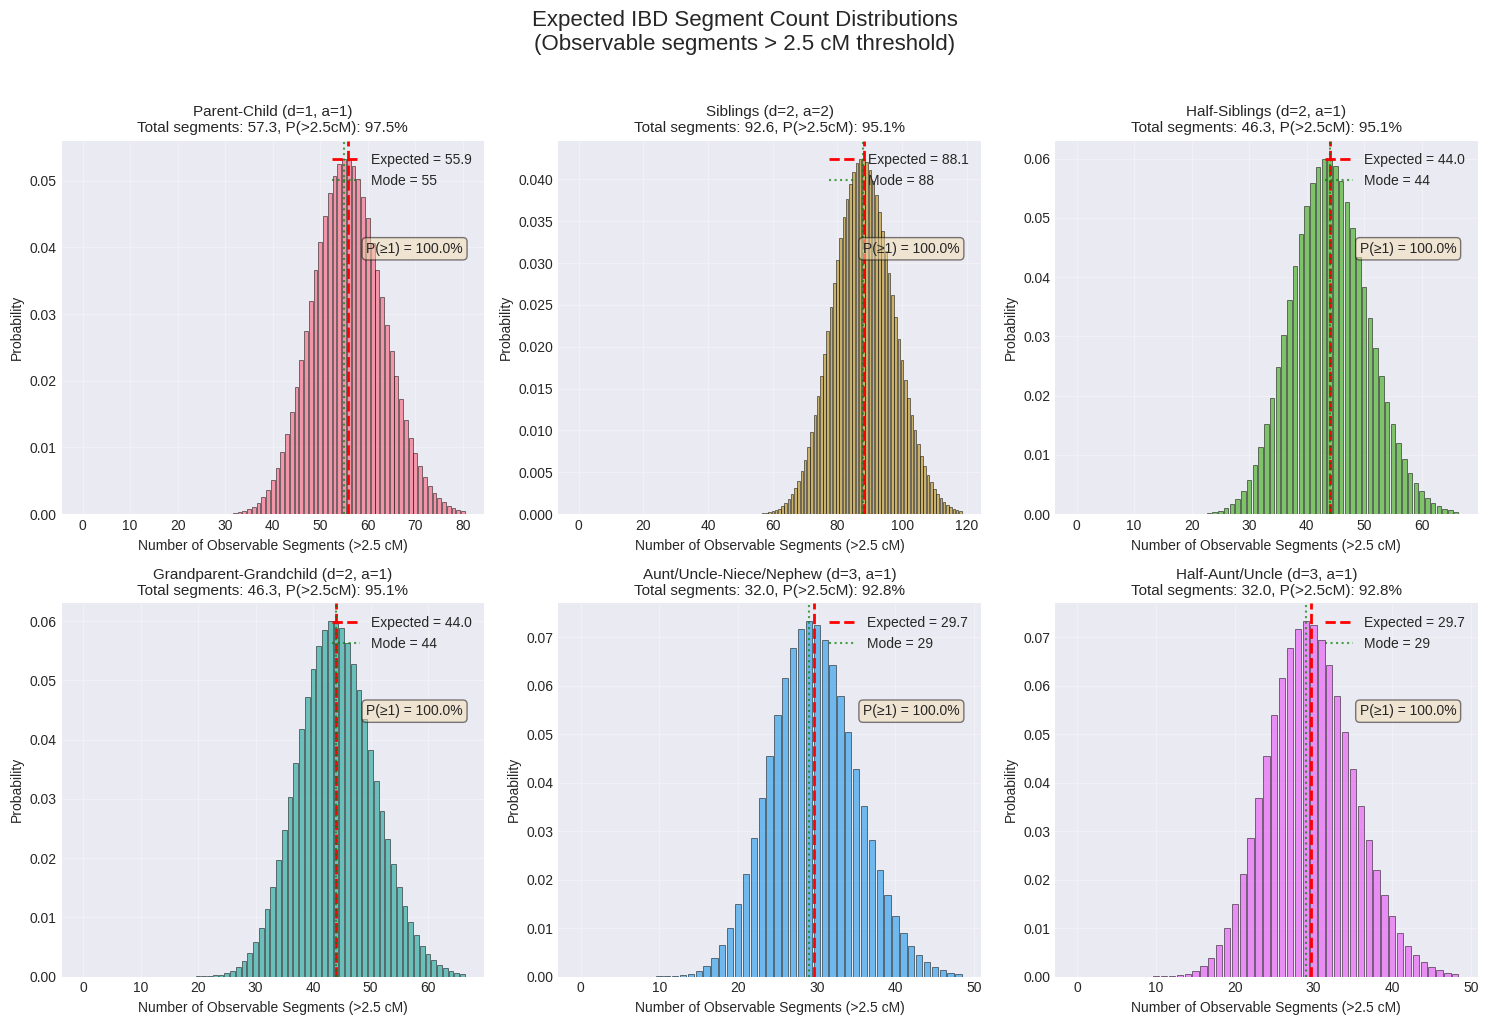

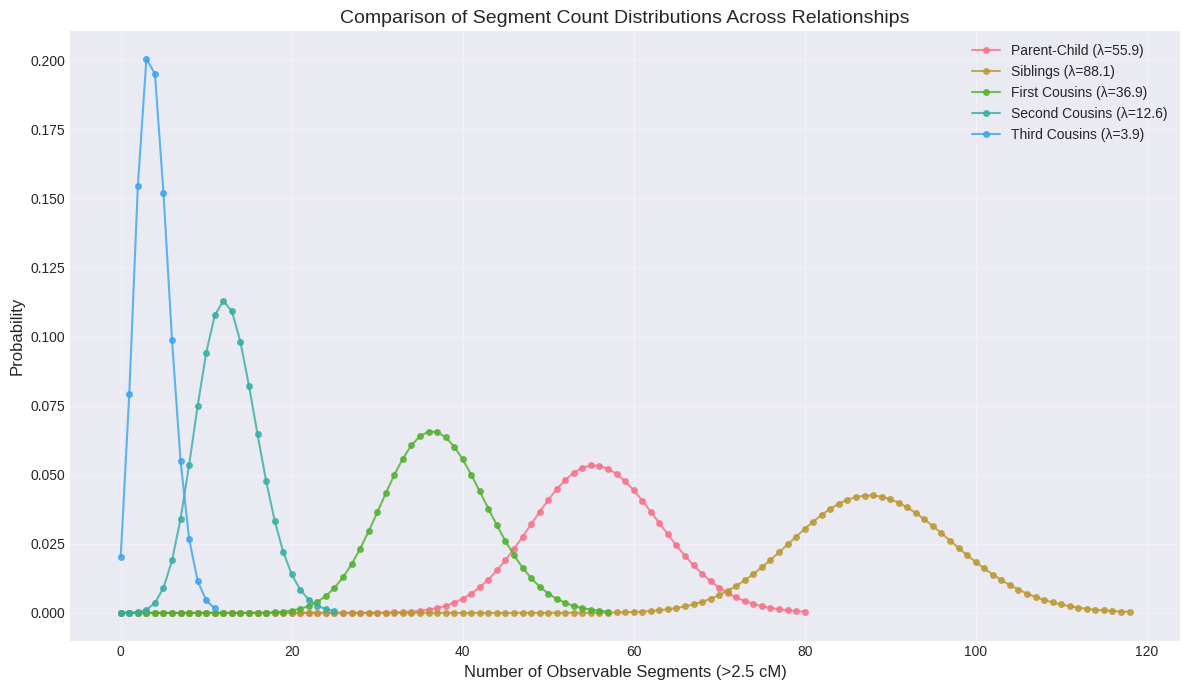

In [ ]:
def plot_segment_count_distributions(relationships_subset=None, model=None):
    """
    Plot expected segment count distributions for different relationships
    Shows the Poisson distribution of observable IBD segments (>2.5 cM)
    """
    if relationships_subset is None:
        relationships_subset = relationships[:6]  # First 6 relationships
    
    if model is None:
        model = ERSAAlternativeHypothesis()
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    for idx, rel in enumerate(relationships_subset):
        if idx >= 6:
            break
            
        ax = axes[idx]
        
        # Calculate distribution parameters
        lambda_param = model.poisson_parameter(rel["d"], rel["a"])
        
        # Set x range based on lambda - show up to 99.9% of distribution
        x_max = int(stats.poisson.ppf(0.999, lambda_param)) + 1
        x = np.arange(0, x_max)
        y = stats.poisson.pmf(x, lambda_param)
        
        # Plot
        bars = ax.bar(x, y, alpha=0.7, color=f'C{idx}', edgecolor='black', linewidth=0.5)
        
        # Add vertical line for mean
        ax.axvline(lambda_param, color='red', linestyle='--', linewidth=2,
                   label=f'Expected = {lambda_param:.1f}')
        
        # Add some key statistics
        mode = np.argmax(y)
        ax.axvline(mode, color='green', linestyle=':', alpha=0.7,
                   label=f'Mode = {mode}')
        
        # Title with more info
        total_segs = model.expected_segments(rel["d"], rel["a"])
        p_exceed = model.segment_probability(rel["d"])
        ax.set_title(f"{rel['name']} (d={rel['d']}, a={rel['a']})\n"
                     f"Total segments: {total_segs:.1f}, P(>2.5cM): {p_exceed:.1%}",
                     fontsize=11)
        
        ax.set_xlabel('Number of Observable Segments (>2.5 cM)')
        ax.set_ylabel('Probability')
        ax.legend(loc='upper right')
        ax.grid(True, alpha=0.3)
        
        # Add text box with probability of observing at least one segment
        p_at_least_one = 1 - stats.poisson.pmf(0, lambda_param)
        ax.text(0.95, 0.7, f'P(≥1) = {p_at_least_one:.1%}', 
                transform=ax.transAxes, ha='right',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.suptitle('Expected IBD Segment Count Distributions\n'
                 '(Observable segments > 2.5 cM threshold)', 
                 fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


def plot_segment_count_comparison():
    """
    Compare segment count distributions for key relationships on one plot
    """
    fig, ax = plt.subplots(figsize=(12, 7))
    
    # Select key relationships to compare
    key_rels = [relationships[0],  # Parent-Child
                relationships[1],  # Siblings  
                relationships[6],  # First Cousins
                relationships[9],  # Second Cousins
                relationships[11]] # Third Cousins
    
    model = ERSAAlternativeHypothesis()
    
    for rel in key_rels:
        lambda_param = model.poisson_parameter(rel["d"], rel["a"])
        x_max = int(stats.poisson.ppf(0.999, lambda_param)) + 1
        x = np.arange(0, x_max)
        y = stats.poisson.pmf(x, lambda_param)
        
        ax.plot(x, y, 'o-', markersize=4, linewidth=1.5, alpha=0.8,
                label=f"{rel['name']} (λ={lambda_param:.1f})")
    
    ax.set_xlabel('Number of Observable Segments (>2.5 cM)', fontsize=12)
    ax.set_ylabel('Probability', fontsize=12)
    ax.set_title('Comparison of Segment Count Distributions Across Relationships', 
                 fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

plot_segment_count_distributions()
plot_segment_count_comparison()

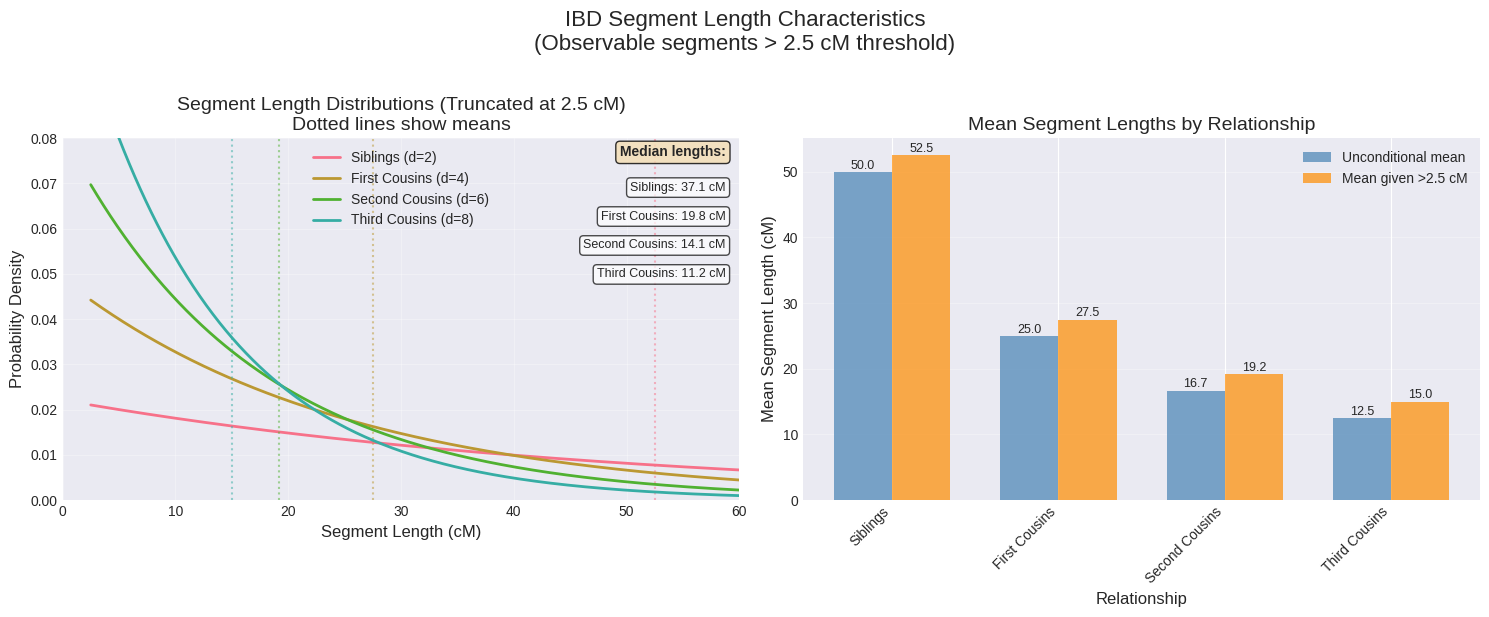

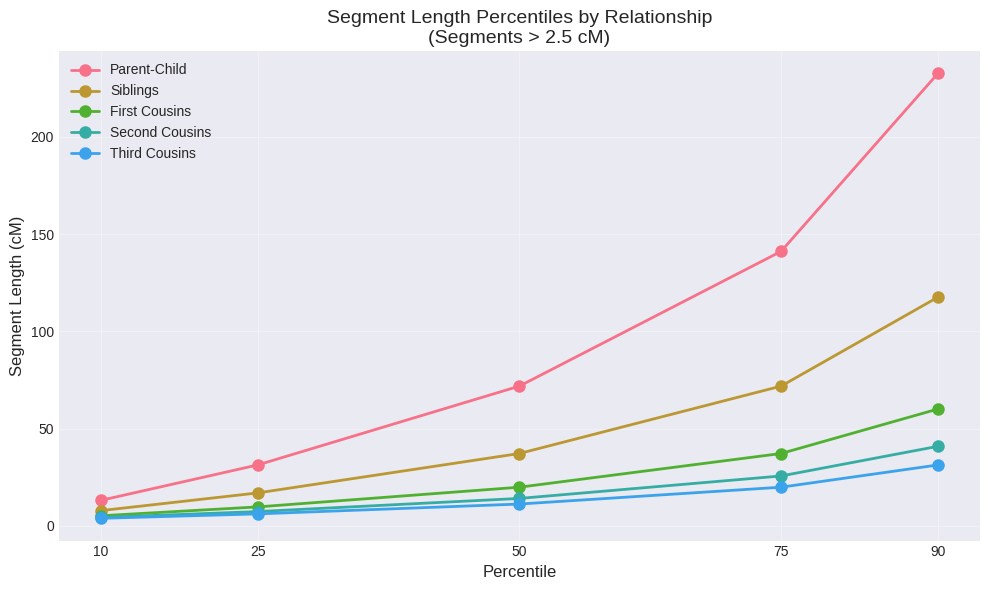

In [33]:
def plot_segment_length_distributions():
    """
    Plot segment length distributions for different relationships
    Shows the truncated exponential distribution (segments > 2.5 cM)
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Initialize model
    model = ERSAAlternativeHypothesis()
    
    # Select relationships to compare
    rel_to_plot = [r for r in relationships if r["name"] in 
                   ["Siblings", "First Cousins", "Second Cousins", "Third Cousins"]]
    
    x = np.linspace(2.5, 100, 1000)
    
    for rel in rel_to_plot:
        d = rel["d"]
        # Use the proper normalized density from equation 7
        # F_A(i|d,t) = (d/100) * exp(-d*(i-t)/100) / p(t)
        # where p(t) = exp(-dt/100)
        p_t = np.exp(-d * 2.5 / 100)
        y = (d/100) * np.exp(-d * (x - 2.5) / 100) / p_t
        
        ax1.plot(x, y, label=f"{rel['name']} (d={d})", linewidth=2)
        
        # Add vertical line for mean of truncated distribution
        mean_truncated = 2.5 + 100/d
        ax1.axvline(mean_truncated, color=ax1.lines[-1].get_color(), 
                   linestyle=':', alpha=0.5)
    
    ax1.set_xlabel('Segment Length (cM)', fontsize=12)
    ax1.set_ylabel('Probability Density', fontsize=12)
    ax1.set_title('Segment Length Distributions (Truncated at 2.5 cM)\nDotted lines show means', 
                  fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xlim(0, 60)
    ax1.set_ylim(0, 0.08)
    
    # Plot both unconditional and conditional mean lengths
    names = [rel["name"] for rel in rel_to_plot]
    mean_uncond = [100/rel["d"] for rel in rel_to_plot]
    mean_cond = [2.5 + 100/rel["d"] for rel in rel_to_plot]
    
    x_pos = np.arange(len(names))
    width = 0.35
    
    bars1 = ax2.bar(x_pos - width/2, mean_uncond, width, label='Unconditional mean', 
                    alpha=0.7, color='steelblue')
    bars2 = ax2.bar(x_pos + width/2, mean_cond, width, label='Mean given >2.5 cM', 
                    alpha=0.7, color='darkorange')
    
    ax2.set_xlabel('Relationship', fontsize=12)
    ax2.set_ylabel('Mean Segment Length (cM)', fontsize=12)
    ax2.set_title('Mean Segment Lengths by Relationship', fontsize=14)
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(names, rotation=45, ha='right')
    ax2.legend()
    ax2.grid(True, alpha=0.3, axis='y')
    
    # Add value labels on bars
    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2, height + 0.5,
                    f'{height:.1f}', ha='center', fontsize=9)
    
    # Add table with key statistics
    ax1.text(0.98, 0.98, 'Median lengths:', transform=ax1.transAxes, 
             ha='right', va='top', fontsize=10, fontweight='bold',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    y_pos = 0.88
    for rel in rel_to_plot:
        d = rel["d"]
        # Median of truncated exponential: t - (100/d)*ln(0.5)
        median = 2.5 + (100/d) * 0.693
        ax1.text(0.98, y_pos, f"{rel['name']}: {median:.1f} cM", 
                transform=ax1.transAxes, ha='right', va='top', fontsize=9,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))
        y_pos -= 0.08
    
    plt.suptitle('IBD Segment Length Characteristics\n(Observable segments > 2.5 cM threshold)', 
                 fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

# Add an additional function to show percentiles
def plot_segment_length_percentiles():
    """
    Show percentiles of segment length distributions
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    
    rel_to_plot = [r for r in relationships if r["name"] in 
                   ["Parent-Child", "Siblings", "First Cousins", 
                    "Second Cousins", "Third Cousins"]]
    
    percentiles = [10, 25, 50, 75, 90]
    
    for i, rel in enumerate(rel_to_plot):
        d = rel["d"]
        # For truncated exponential: F(x) = 1 - exp(-d(x-t)/100)
        # Solve for x: x = t - (100/d)*ln(1-p)
        
        x_percentiles = []
        for p in percentiles:
            x = 2.5 - (100/d) * np.log(1 - p/100)
            x_percentiles.append(x)
        
        ax.plot(percentiles, x_percentiles, 'o-', markersize=8, 
                linewidth=2, label=rel["name"])
    
    ax.set_xlabel('Percentile', fontsize=12)
    ax.set_ylabel('Segment Length (cM)', fontsize=12)
    ax.set_title('Segment Length Percentiles by Relationship\n(Segments > 2.5 cM)', 
                 fontsize=14)
    ax.legend()
    ax.grid(True, alpha=0.3)
    ax.set_xticks(percentiles)
    
    plt.tight_layout()
    plt.show()

plot_segment_length_distributions()
plot_segment_length_percentiles()

In [ ]:
from typing import List, Tuple, Dict
import numpy as np
from scipy import stats

class ERSACompleteLikelihood(ERSAAlternativeHypothesis):
    """
    Extended class with complete likelihood calculations including null hypothesis
    """
    
    def __init__(self, eta: float = 12, mu: float = 3.12, **kwargs):
        """
        Initialize with additional parameters for null hypothesis
        
        Parameters:
        -----------
        eta : float
            Mean number of background segments (default: 12 for CEU)
        mu : float
            Mean background segment length (default: 3.12 cM)
        """
        super().__init__(**kwargs)
        self.eta = eta
        self.mu = mu
    
    def null_segment_count_likelihood(self, n: int) -> float:
        """
        Likelihood of n segments under null hypothesis
        Implements N_P(n|t) from equation 1
        """
        return stats.poisson.pmf(n, self.eta)
    
    def null_segment_length_density(self, length: float) -> float:
        """
        Segment length density under null hypothesis
        Implements F_P(i|t) from equation 3
        
        Note: This is a truncated exponential with threshold t
        """
        if length < self.t:
            return 0
        # This is the corrected formula from equation 3
        return np.exp(-(length - self.t) / self.mu) / self.mu
    
    def alternative_likelihood(self, n_total: int, segments: List[float], 
                             d: int, a: int) -> Tuple[float, int]:
        """
        Complete alternative hypothesis likelihood
        Implements equation 9 and 10 from ERSA paper
        
        Returns:
        --------
        Tuple[float, int]
            (maximum likelihood, optimal n_A)
        """
        segments = sorted(segments, reverse=True)  # Sort longest first
        max_log_likelihood = -np.inf
        best_n_A = 0
        
        for n_A in range(n_total + 1):
            n_P = n_total - n_A
            
            # Use log likelihoods to avoid numerical issues
            log_likelihood = 0
            
            # Background component
            log_likelihood += stats.poisson.logpmf(n_P, self.eta)
            for seg in segments[n_A:]:
                density = self.null_segment_length_density(seg)
                if density > 0:
                    log_likelihood += np.log(density)
                else:
                    log_likelihood = -np.inf
                    break
            
            # Recent ancestry component
            if n_A > 0:
                ancestry_count_likelihood = self.segment_count_likelihood(n_A, d, a)
                if ancestry_count_likelihood > 0:
                    log_likelihood += np.log(ancestry_count_likelihood)
                else:
                    log_likelihood = -np.inf
                    
                for seg in segments[:n_A]:
                    density = self.segment_length_density(seg, d)
                    if density > 0:
                        log_likelihood += np.log(density)
                    else:
                        log_likelihood = -np.inf
                        break
            
            if log_likelihood > max_log_likelihood:
                max_log_likelihood = log_likelihood
                best_n_A = n_A
                
        return np.exp(max_log_likelihood) if max_log_likelihood > -np.inf else 0, best_n_A
    
    def likelihood_ratio_test(self, segments: List[float], d: int, a: int) -> Dict:
        """
        Perform likelihood ratio test
        
        Returns:
        --------
        Dict
            Test statistics and p-value
        """
        n_total = len(segments)
        
        # Null hypothesis log-likelihood
        log_L_null = stats.poisson.logpmf(n_total, self.eta)
        for seg in segments:
            density = self.null_segment_length_density(seg)
            if density > 0:
                log_L_null += np.log(density)
            else:
                log_L_null = -np.inf
                break
        
        # Alternative hypothesis likelihood
        L_alt, n_A = self.alternative_likelihood(n_total, segments, d, a)
        log_L_alt = np.log(L_alt) if L_alt > 0 else -np.inf
        
        # Likelihood ratio test statistic
        if log_L_alt > log_L_null and log_L_null > -np.inf:
            LR = -2 * (log_L_null - log_L_alt)
        else:
            LR = 0
            
        # Chi-square test with 2 degrees of freedom
        p_value = stats.chi2.sf(LR, df=2) if LR > 0 else 1.0
        
        return {
            'L_null': np.exp(log_L_null) if log_L_null > -np.inf else 0,
            'L_alt': L_alt,
            'log_L_null': log_L_null,
            'log_L_alt': log_L_alt,
            'n_A': n_A,
            'n_P': n_total - n_A,
            'LR': LR,
            'p_value': p_value,
            'significant': p_value < 0.001
        }
    
    def null_likelihood(self, segments: List[float]) -> float:
        """
        Calculate complete null hypothesis likelihood
        Implements L_P(n,s|t) from equation 1
        """
        n = len(segments)
        log_likelihood = stats.poisson.logpmf(n, self.eta)
        for seg in segments:
            density = self.null_segment_length_density(seg)
            if density > 0:
                log_likelihood += np.log(density)
            else:
                return 0
        return np.exp(log_likelihood)
    
